# Choosing a Schema Verifier Model

Models Tested:
  - Linear Regression
  - KNN
    - No Scaling
    - Standard Scaling
    - Robust Scaling
    - MinMaxScaling
    - GridSearchCV

Model Chosen: KNN with MinMaxScaling

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
schemas_path = "../data/schemas.txt"
# Create the dataframe
df = pd.read_csv(schemas_path, sep=";")
df.head()

,Type,Modulus,Size,Skip Values,Skip Type,Result
0,Stripes,4,16,10,original,0
1,Circles,4,3,10,original,0
2,Squares,29,3,"5,10",original,0
3,Circles,12,1,"10,20,30,40,50,60,70",original,0
4,Circles,12,31,"10,20",original,0


In [60]:
df.shape

(480, 6)

In [61]:
# Check the amount of Results are 0, 1, and 2
df.Result.value_counts()

0    324
2    156
Name: Result, dtype: int64

In [62]:
# Get the types where the Results are 0, 1, and 2
empties = df.where(df.Result == 1).Type.value_counts()
fulls = df.where(df.Result == 2).Type.value_counts()
oks = df.where(df.Result == 0).Type.value_counts()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

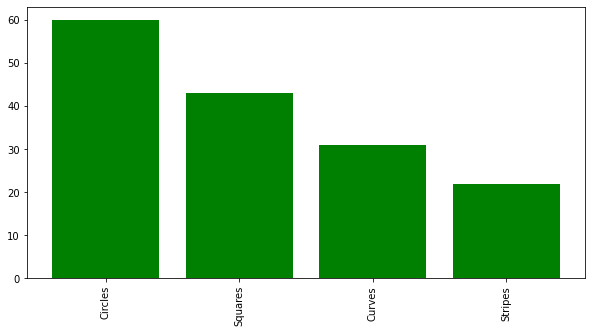

In [63]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(empties.index, empties.values, color="red")
plt.bar(fulls.index, fulls.values, color="green")
# plt.bar(oks.index, oks.values, color="blue")
plt.xticks(rotation=90)

C:\Users\jorda\AppData\Local\Temp/ipykernel_4792/4194772942.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(empties.values, labels=empties.index, autopct="%1.1f%%")


Text(0.5, 1.0, 'OK schemas')

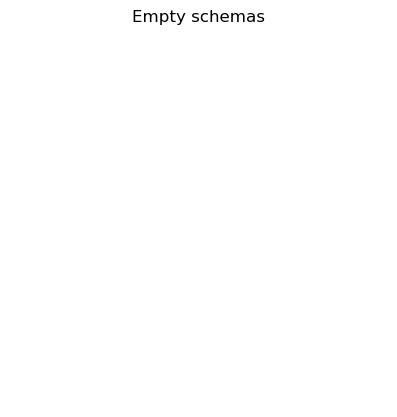

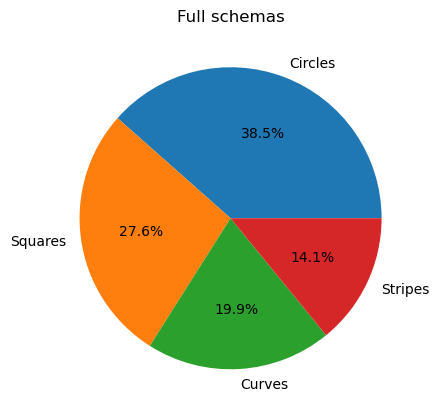

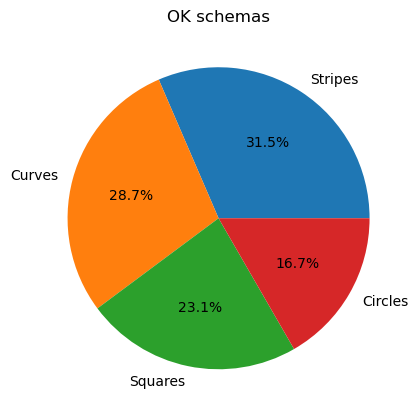

In [64]:
# Plot the results as a pie chart
# Make the text color white
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(empties.values, labels=empties.index, autopct="%1.1f%%")
plt.title("Empty schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(fulls.values, labels=fulls.index, autopct="%1.1f%%")
plt.title("Full schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(oks.values, labels=oks.index, autopct="%1.1f%%")
plt.title("OK schemas")

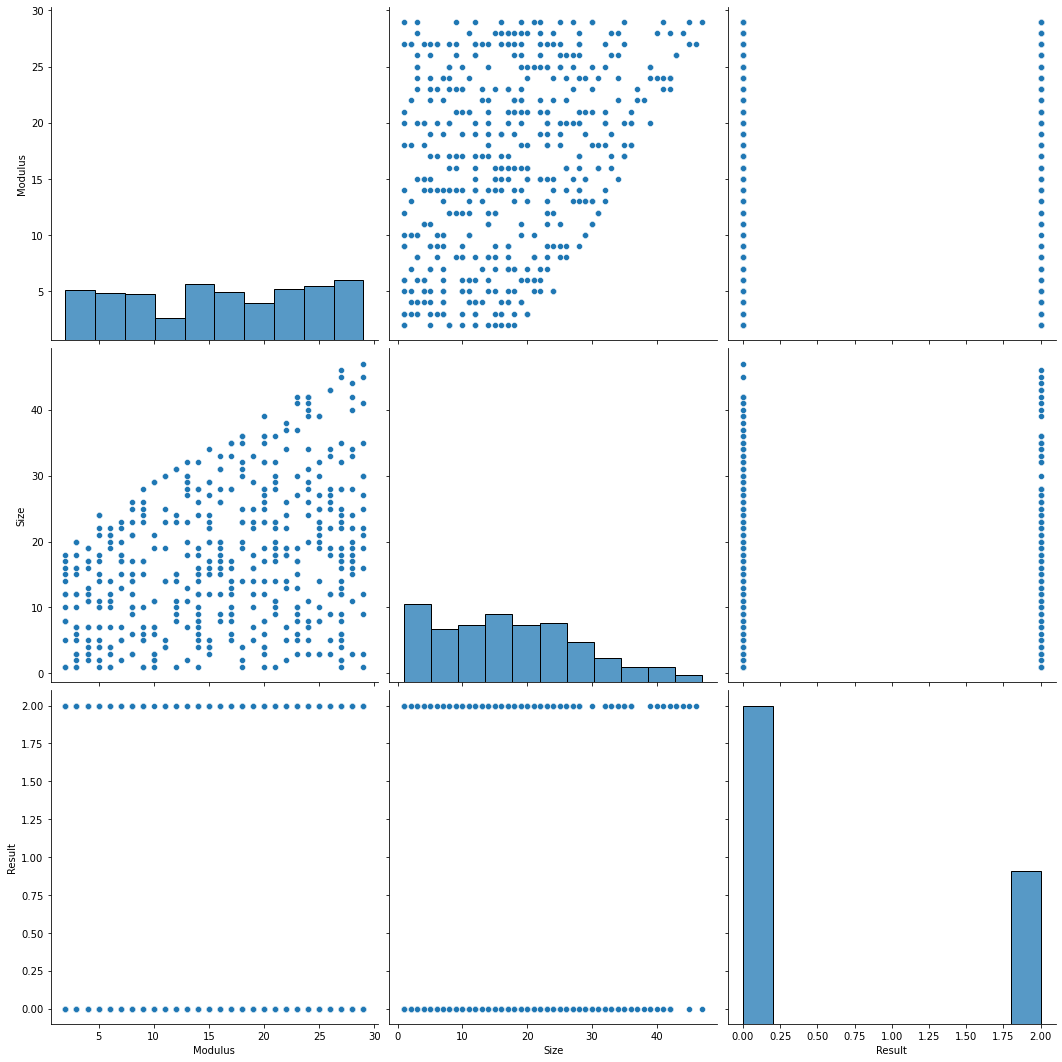

In [65]:
sns.pairplot(df, height=5)

In [66]:
# Convert the Type column to a dummy variable
df = pd.get_dummies(df, columns=["Type"])
df.head()

,Modulus,Size,Skip Values,Skip Type,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,4,16,10,original,0,0,0,0,1
1,4,3,10,original,0,1,0,0,0
2,29,3,"5,10",original,0,0,0,1,0
3,12,1,"10,20,30,40,50,60,70",original,0,1,0,0,0
4,12,31,"10,20",original,0,1,0,0,0


In [67]:
# Convert the Result column to a 1 or a 0
df.Result = df.Result.map({0: 1, 1: 0, 2: 0})

In [68]:
# sns.pairplot(df, height=2.5)

# Model

In [69]:
# Drop unnecessary columns
df = df.drop(columns=["Skip Type"], axis=1)
df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,4,16,10,1,0,0,0,1
1,4,3,10,1,1,0,0,0
2,29,3,"5,10",1,0,0,1,0
3,12,1,"10,20,30,40,50,60,70",1,1,0,0,0
4,12,31,"10,20",1,1,0,0,0


In [70]:
# Find the starting number of the Skip Values
df["Skip Values"] = df["Skip Values"].map(lambda x: int(x.split(",")[0]))

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [72]:
model = LinearRegression()
sclaer = MinMaxScaler()

In [73]:
linear_df = df.copy()
linear_df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,4,16,10,1,0,0,0,1
1,4,3,10,1,1,0,0,0
2,29,3,5,1,0,0,1,0
3,12,1,10,1,1,0,0,0
4,12,31,10,1,1,0,0,0


In [74]:
features = ["Modulus", "Size", "Skip Values"]

for feature in features:
    linear_df[feature] = sclaer.fit_transform(linear_df[feature].values.reshape(-1, 1))

linear_df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.074074,0.326087,1.000000,1,0,0,0,1
1,0.074074,0.043478,1.000000,1,1,0,0,0
2,1.000000,0.043478,0.444444,1,0,0,1,0
3,0.370370,0.000000,1.000000,1,1,0,0,0
4,0.370370,0.652174,1.000000,1,1,0,0,0


In [75]:
# Split the data into training and testing sets
X = linear_df.drop(columns=["Result"], axis=1)
y = linear_df["Result"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 7)
(96, 7)
(384, 1)
(96, 1)


In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
print(model.coef_)
print(model.intercept_)

[[ 5.23031013e-02 -3.58860880e-02  8.07016259e-01 -1.75504873e+13
  -1.75504873e+13 -1.75504873e+13 -1.75504873e+13]]
[1.75504873e+13]


Text(0, 0.5, 'Result')

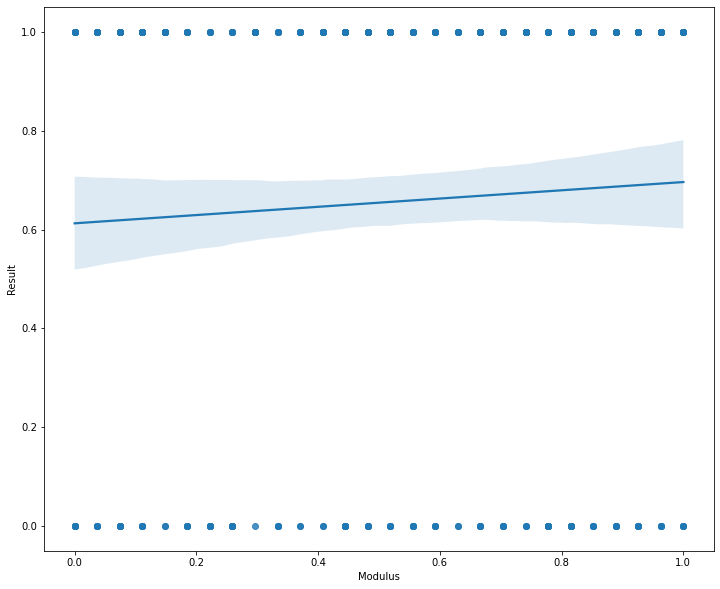

In [79]:
plt.figure(figsize=(12, 10))
sns.regplot(x=X_train.Modulus, y=y_train, data=df)
plt.xlabel("Modulus")
plt.ylabel("Result")

In [80]:
y_pred = model.predict(X_test)

In [81]:
# Score the model
print(model.score(X_test, y_test))

0.2499173482259115


# KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [83]:
df_no_scaling = df.copy()
df_standard_scaling = df.copy()
df_minmax_scaling = df.copy()
df_robust_scaling = df.copy()

In [84]:
# Split the data frame into training and test sets
X_train_no_scaling, X_test_no_scaling, y_train_no_scaling, y_test_no_scaling = train_test_split(df_no_scaling.drop("Result", axis=1), df_no_scaling.Result, test_size=0.2)

# No scaling

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

In [86]:
knn.fit(X_train_no_scaling, y_train_no_scaling)

KNeighborsClassifier(n_neighbors=3)

In [87]:
X_test_no_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
473,20,39,2,1,0,0,0
58,6,4,3,0,0,1,0
437,4,11,1,1,0,0,0
451,29,41,5,0,0,0,1
284,26,43,3,1,0,0,0


In [88]:
# Predict the test set
y_pred_no_scaling = knn.predict(X_test_no_scaling)
print(y_pred_no_scaling)

[1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0]


In [89]:
# Score the model
knn.score(X_test_no_scaling, y_test_no_scaling)

0.7291666666666666

# Standard Scaling

In [90]:
scaler = StandardScaler()

In [91]:
features = [["Modulus", "Size", "Skip Values"]]
for feature in features:
    df_standard_scaling[feature] = scaler.fit_transform(df_standard_scaling[feature])
df_standard_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,-1.477373,-0.126045,2.033672,1,0,0,0,1
1,-1.477373,-1.328678,2.033672,1,1,0,0,0
2,1.587186,-1.328678,0.369002,1,0,0,1,0
3,-0.496714,-1.513699,2.033672,1,1,0,0,0
4,-0.496714,1.261608,2.033672,1,1,0,0,0


In [92]:
# Create the training and test sets
X_train_standard_scaling, X_test_standard_scaling, y_train_standard_scaling, y_test_standard_scaling = train_test_split(df_standard_scaling.drop("Result", axis=1), df_standard_scaling.Result, test_size=0.2, random_state=4)

In [93]:
X_train_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
13,-0.128967,0.614037,-0.296866,0,1,0,0
193,0.974274,1.539139,-0.629800,1,0,0,0
461,-0.496714,-0.311066,2.033672,0,0,0,1
191,1.096857,2.001690,-0.296866,0,1,0,0
300,-0.864461,-0.681107,2.033672,1,0,0,0


In [94]:
X_test_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
405,-0.251549,0.984078,-0.962734,0,1,0,0
220,-0.987043,0.799057,0.369002,0,1,0,0
47,-0.251549,-0.773617,-0.629800,0,0,0,1
66,1.096857,0.706547,-0.296866,0,0,0,1
355,1.096857,-1.328678,-0.962734,0,0,0,1


In [95]:
knn = KNeighborsClassifier()

In [96]:
# Train
knn.fit(X_train_standard_scaling, y_train_standard_scaling)

KNeighborsClassifier()

In [97]:
# Predict
y_pred_standard_scaling = knn.predict(X_test_standard_scaling)
y_pred_standard_scaling

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [98]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_standard_scaling, y_pred_standard_scaling))
print(knn.score(X_test_standard_scaling, y_test_standard_scaling))
print(roc_auc_score(y_test_standard_scaling, y_pred_standard_scaling))

0.75
0.75
0.7083333333333333


# Robust Scaling

In [99]:
scaler = RobustScaler()
knn = KNeighborsClassifier()

In [100]:
for feature in features:
    df_robust_scaling[feature] = scaler.fit_transform(df_robust_scaling[feature])
df_robust_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,-0.857143,-0.058824,2.333333,1,0,0,0,1
1,-0.857143,-0.823529,2.333333,1,1,0,0,0
2,0.928571,-0.823529,0.666667,1,0,0,1,0
3,-0.285714,-0.941176,2.333333,1,1,0,0,0
4,-0.285714,0.823529,2.333333,1,1,0,0,0


In [101]:
# Create the training and test sets
X_train_robust_scaling, X_test_robust_scaling, y_train_robust_scaling, y_test_robust_scaling = train_test_split(df_robust_scaling.drop("Result", axis=1), df_robust_scaling.Result, test_size=0.2, random_state=4)

In [102]:
# Train
knn.fit(X_train_robust_scaling, y_train_robust_scaling)

KNeighborsClassifier()

In [103]:
y_pred_robust_scaling = knn.predict(X_test_robust_scaling)
print(y_pred_robust_scaling)

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1]


In [104]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_robust_scaling, y_pred_robust_scaling))
print(knn.score(X_test_robust_scaling, y_test_robust_scaling))
print(roc_auc_score(y_test_robust_scaling, y_pred_robust_scaling))

0.8541666666666666
0.8541666666666666
0.8194444444444444


# MinMaxScaling

In [105]:
scaler = MinMaxScaler()
knn = KNeighborsClassifier()

In [106]:
for feature in features:
    df_minmax_scaling[feature] = scaler.fit_transform(df_minmax_scaling[feature])
df_minmax_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.074074,0.326087,1.000000,1,0,0,0,1
1,0.074074,0.043478,1.000000,1,1,0,0,0
2,1.000000,0.043478,0.444444,1,0,0,1,0
3,0.370370,0.000000,1.000000,1,1,0,0,0
4,0.370370,0.652174,1.000000,1,1,0,0,0


In [107]:
# Create the training and test sets
X_train_minmax_scaling, X_test_minmax_scaling, y_train_minmax_scaling, y_test_minmax_scaling = train_test_split(df_minmax_scaling.drop("Result", axis=1), df_minmax_scaling.Result, test_size=0.2, random_state=4)

In [108]:
# Train
knn.fit(X_train_minmax_scaling, y_train_minmax_scaling)

KNeighborsClassifier()

In [109]:
y_pred_minmax_scaling = knn.predict(X_test_minmax_scaling)
print(y_pred_minmax_scaling)

[1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1]


In [110]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_minmax_scaling, y_pred_minmax_scaling))
print(knn.score(X_test_minmax_scaling, y_pred_minmax_scaling))
print(roc_auc_score(y_test_minmax_scaling, y_pred_minmax_scaling))

0.7708333333333334
1.0
0.7083333333333334


# GridSearchCV

In [111]:
knn = KNeighborsClassifier()
# List Hyperparameters to tune
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p =[1, 2]

In [112]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [113]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Result", axis=1), df.Result, test_size=0.2, random_state=4)

In [114]:
# # Make model
# clf = GridSearchCV(knn, hyperparameters, cv=10)
# best_model = clf.fit(X_train, y_train)

In [115]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'best_model' is not defined

In [ ]:
# Predict test set
y_pred = best_model.predict(X_test)

In [ ]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test, y_pred))
print(best_model.score(X_test, y_test))
print(roc_auc_score(y_test, y_pred))

0.6802030456852792
0.6802030456852792
0.6945892410341952
